In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay 

In [68]:
data = pd.read_csv('classification.csv') #from kaggle

In [69]:
# data.head(3) 

In [70]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [72]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
situation=['fail','success']

## logistic regression

In [74]:
logit = LogisticRegression(random_state = 0)
logit.fit(X_train,y_train)
y_pred = logit.predict(X_test)

0.8666666666666667


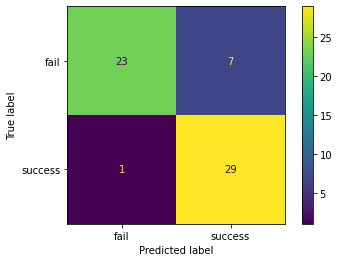

In [75]:
# print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=situation)
disp.plot()
plt.show()

k-fold

In [76]:
right = cross_val_score(estimator = logit, X=X, y=y, cv=10)
print(right)
print()
print('k-fold mean score : '+str(right.mean()*100))
print('k-fold standard deviation : '+str(right.std()*100))

[0.93333333 0.8        0.9        0.8        0.76666667 0.9
 0.83333333 0.93103448 0.96551724 0.86206897]

k-fold mean score : 86.91954022988506
k-fold standard deviation : 6.36698612791161


## knn

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

0.9166666666666666


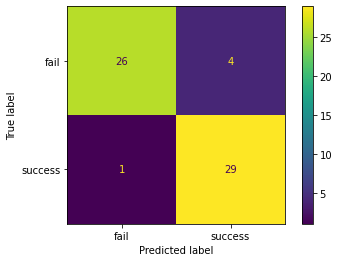

In [78]:
# print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=situation)
disp.plot()
plt.show()

k-flod

In [79]:
right = cross_val_score(estimator = knn, X=X, y=y, cv=10)
print(right)
print()
print('k-fold mean score : '+str(right.mean()*100))
print('k-fold standard deviation : '+str(right.std()*100))

[0.96666667 0.93333333 0.96666667 0.86666667 0.83333333 1.
 0.93333333 1.         0.93103448 0.93103448]

k-fold mean score : 93.62068965517241
k-fold standard deviation : 5.048123545218002


## SVM

In [80]:
svm = SVC(kernel='linear',random_state=0)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

0.8666666666666667


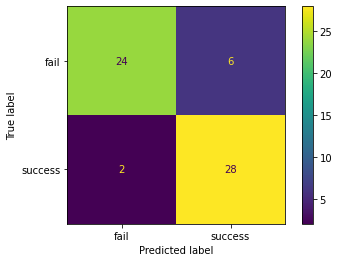

In [81]:
# print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=situation)
disp.plot()
plt.show()

k-fold

In [82]:
right = cross_val_score(estimator = svm, X=X, y=y, cv=10)
print(right)
print()
print('k-fold mean score : '+str(right.mean()*100))
print('k-fold standard deviation : '+str(right.std()*100))

[0.86666667 0.83333333 0.93333333 0.8        0.83333333 0.9
 0.83333333 0.93103448 0.96551724 0.86206897]

k-fold mean score : 87.58620689655172
k-fold standard deviation : 5.14038615517193
